## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Alena\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Starting by reviewing the data info.

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Applying the describe function to the data.

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Currently, the missing values in the dataset are represented as zeros. Replacing the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan.

In [5]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [6]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Ploting histograms of each column. 

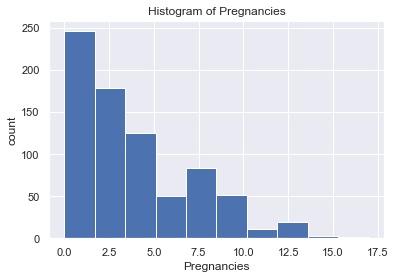

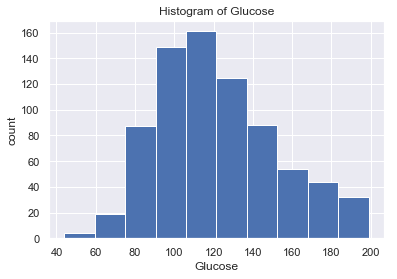

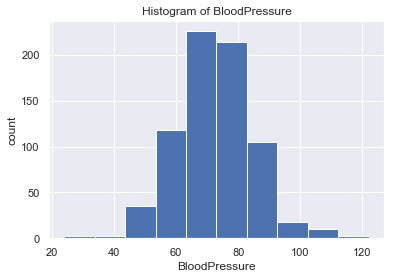

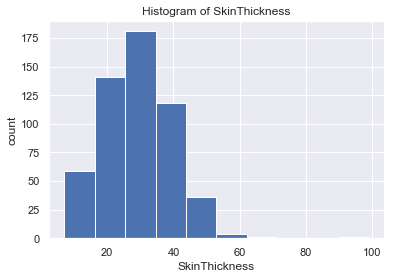

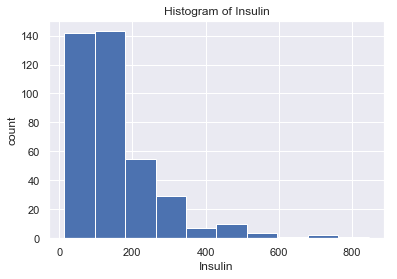

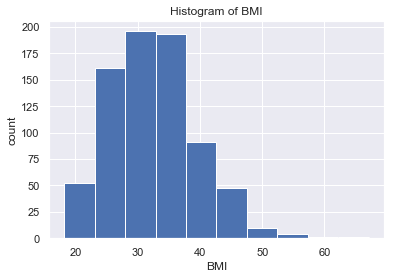

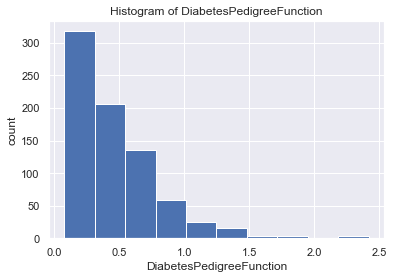

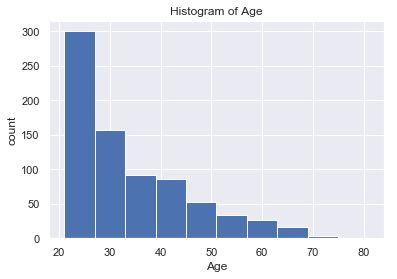

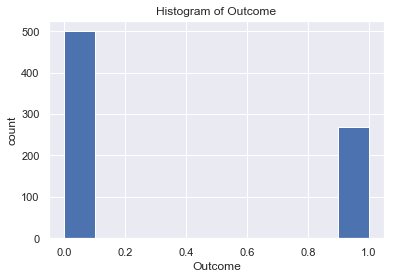

In [7]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


def plot_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        df[col].plot(kind='hist')
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.show()
        
plot_hist(diabetes_data, cols)

#### Replacing the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

#### Plotting histograms of each column after replacing nan. 

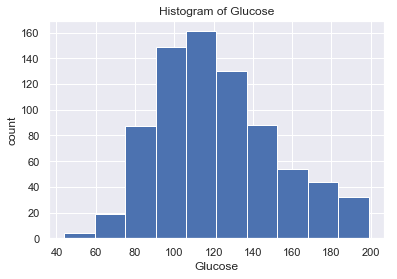

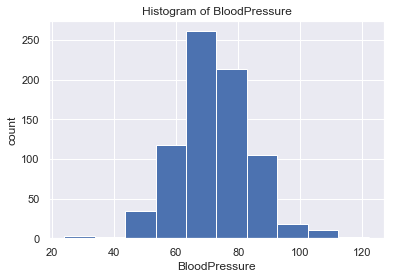

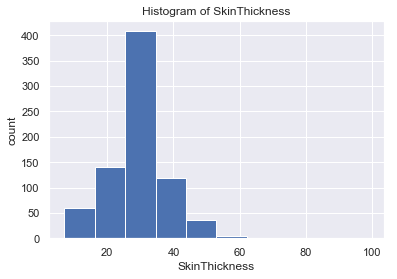

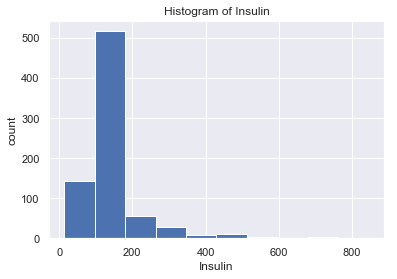

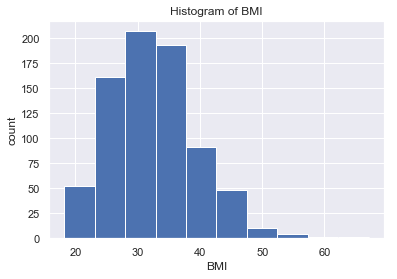

In [9]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

def plot_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        df[col].plot(kind='hist')
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.show()
        
plot_hist(diabetes_data, cols)

#### Ploting the correlation matrix heatmap

Correlation between various features


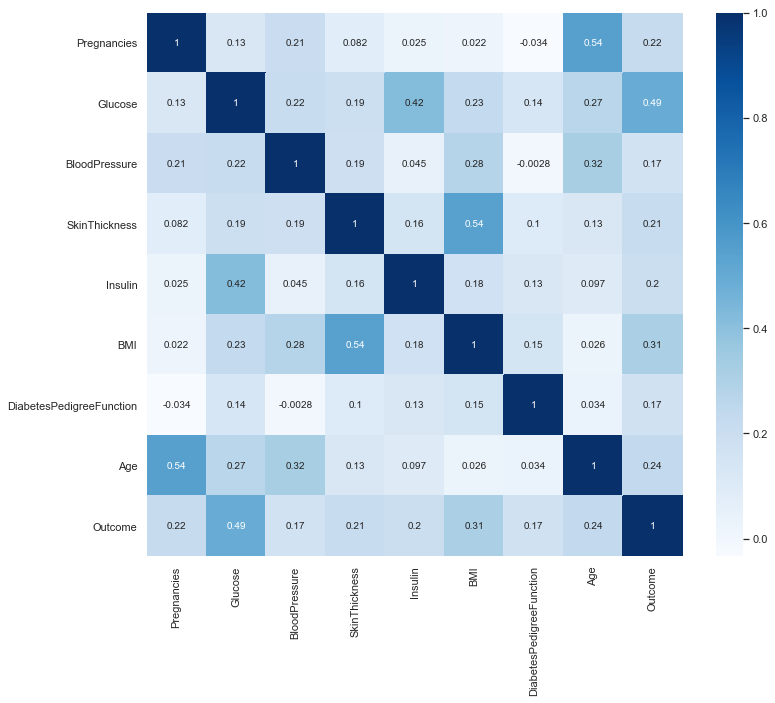

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

#### Defining the `y` variable as the `Outcome` column.

In [11]:
y = diabetes_data['Outcome']

X = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

##### Creating a 70/30 train and test split. 

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#### Scaling the values. 

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.69748316, -0.79647461, -1.16842292, ...,  0.24771813,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.3315193 ,  0.2257678 , ...,  0.49203737,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.46436368, -0.67635561, ..., -0.2121769 ,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.16664709,  0.63582389, ...,  0.57826769,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.56399695, -0.1842883 , ..., -0.2121769 ,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.49390756,  0.79984633, ...,  0.50640909,
        -0.91851573,  0.16493409]])

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the data.

In [14]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

#### Printing the train and test scores for each iteration.

In [15]:
print('neighbors(n): ',1,'\t','train_scores: ',train_scores[0],'\t','\t','\t','test_scores: ',test_scores[0])
for i in range(1,9):    
    print('neighbors(n): ',i+1,'\t','train_scores: ',train_scores[i],'\t','test_scores: ',test_scores[i])

neighbors(n):  1 	 train_scores:  1.0 	 	 	 test_scores:  0.683982683982684
neighbors(n):  2 	 train_scores:  0.845437616387337 	 test_scores:  0.7056277056277056
neighbors(n):  3 	 train_scores:  0.839851024208566 	 test_scores:  0.6926406926406926
neighbors(n):  4 	 train_scores:  0.8212290502793296 	 test_scores:  0.70995670995671
neighbors(n):  5 	 train_scores:  0.8212290502793296 	 test_scores:  0.670995670995671
neighbors(n):  6 	 train_scores:  0.8212290502793296 	 test_scores:  0.7012987012987013
neighbors(n):  7 	 train_scores:  0.8119180633147114 	 test_scores:  0.696969696969697
neighbors(n):  8 	 train_scores:  0.8044692737430168 	 test_scores:  0.696969696969697
neighbors(n):  9 	 train_scores:  0.7951582867783985 	 test_scores:  0.70995670995671


#### Identifying the number of neighbors that resulted in the max score in the training dataset. 

In [16]:
max(train_scores) # 1 neighbor from above

1.0

#### Identifying the number of neighbors that resulted in the max score in the testing dataset. 

In [17]:
max(test_scores) # 4 or 9 neighbors from above

0.70995670995671

Plotting the train and test model performance by number of neighbors.

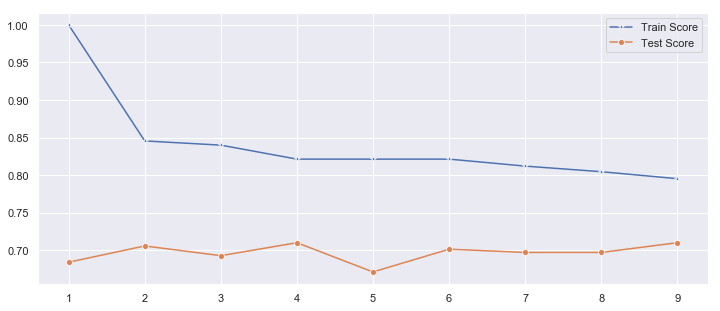

In [18]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

#### Fitting and score the best number of neighbors based on the plot.

In [19]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8212290502793296
0.70995670995671


In [20]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

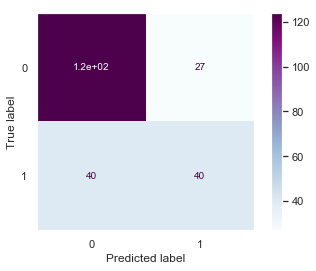

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test, cmap = 'BuPu')
plt.grid(False)
plt.show()

**<font color='teal'> Print the classification report </font>**

In [23]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       151
           1       0.60      0.50      0.54        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [25]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

#### Applying the grid search method to find the optimal number of estimators in a Randon Forest model.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier()

params = {
        'n_estimators': [50,100,150,200,250],
        }

grid = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=3 )

# fit the model with the training data
grid.fit(X_train,y_train) 

acc = grid.score(X_test, y_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.771, total=   0.1s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.782, total=   0.2s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.749, total=   0.1s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.771, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.760, total=   0.3s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.765, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] .................... n_estimators=150, score=0.788, total=   0.5s
[CV] n_estimators=150 ................................................
[CV] .................... n_estimators=150, score=0.749, total=   0.7s
[CV] n_estimators=150 ................................................
[CV] .................... n_estimators=150, score=0.743, total=   0.5s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.788, total=   0.6s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.7s finished


In [27]:
print("Best parameters: {}".format(grid.best_params_))
print("Accuracy: {}".format(acc))

Best parameters: {'n_estimators': 250}
Accuracy: 0.7619047619047619
